# Reservoir Computing and Mackey-Glass prediction

This notebook is an example of Mackey-Glass prediction using Reservoir Computing, towards an optical implementation.

## Initialization

In [1]:
import numpy as np
import time

from reservoir import Reservoir
import data1D
import data_utils

%load_ext autoreload
%autoreload 1
%aimport data1D
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Data generation

In [2]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)

## Reservoir initialization

In [ ]:
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=1, 
              future_pred=True, pred_horizon=100, rec_pred_steps=5,
              train_method='ridge', train_param=1e-5
              )

## Reservoir Training

In [6]:
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.019999980926513672s
100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 25773.20it/s]
Iterations finished. Elapsed time: 0.39499998092651367s
Training finished. Elapsed time: 0.24099993705749512s
Training score: 0.9863036012074141


## Reservoir Validation

In [5]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=1)

In [6]:
pred_output, valid_score = b.predict_and_score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0007498264312744141
100%|██████████| 3000/3000 [00:00<00:00, 11370.77it/s]
Iterations finished. Elapsed time: 0.26860713958740234
Testing finished. Elapsed time: 0.04170489311218262
Testing score: 0.9561790356211705


# Score for predictions far in the future

In [22]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=1, 
              future_pred=True, pred_horizon=2000, rec_pred_steps=5,
              train_method='ridge', train_param=1e1
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.1888561248779297s
100%|██████████| 10000/10000 [00:00<00:00, 13222.17it/s]
Iterations finished. Elapsed time: 0.7618739604949951s
Training finished. Elapsed time: 2.5301761627197266s
Training score: 0.1616592418847732


In [23]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0002567768096923828
100%|██████████| 10000/10000 [00:00<00:00, 16709.80it/s]
Iterations finished. Elapsed time: 0.6082394123077393
Testing finished. Elapsed time: 2.3014278411865234
Testing score: 0.1426553343152499


Text(0, 0.5, 'Score')

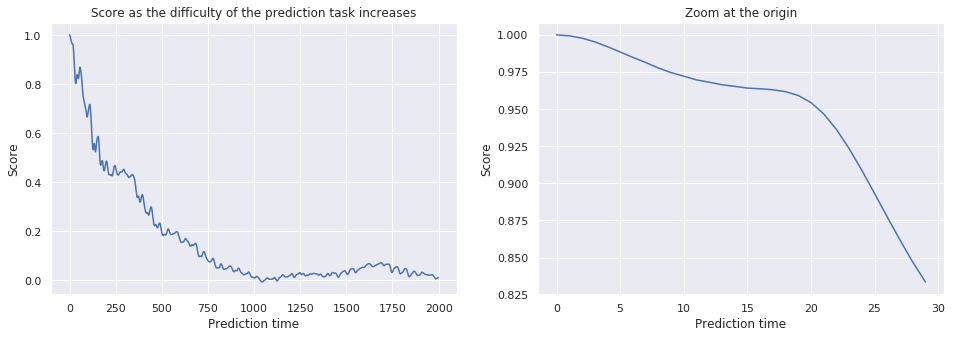

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(valid_score)
ax1.set_title('Score as the difficulty of the prediction task increases')
ax1.set_xlabel('Prediction time')
ax1.set_ylabel('Score')

ax2.plot(valid_score[:30])
ax2.set_title('Zoom at the origin')
ax2.set_xlabel('Prediction time')
ax2.set_ylabel('Score')

# Time series length needed

In [103]:
n_length = 100
length_vec = np.ceil(np.logspace(2.1, 3.5, num=n_length))
score_vec = np.zeros((n_length, ))

for i_l in range(n_length):
    length = length_vec[i_l]
    print('Current training time series length: ' + str(length))
    input_data = data1D.mackey_glass(sequence_length=int(length), n_sequence=1)
    b = Reservoir(future_pred=True, verbose=False)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[i_l] = np.mean(valid_score)

Current training time series length: 126.0
100%|██████████| 10000/10000 [00:00<00:00, 26210.39it/s]
Current training time series length: 131.0
100%|██████████| 10000/10000 [00:00<00:00, 27257.17it/s]
Current training time series length: 135.0
100%|██████████| 10000/10000 [00:00<00:00, 26018.82it/s]
Current training time series length: 139.0
100%|██████████| 10000/10000 [00:00<00:00, 16061.94it/s]
Current training time series length: 144.0
100%|██████████| 10000/10000 [00:00<00:00, 23806.80it/s]
Current training time series length: 149.0
100%|██████████| 10000/10000 [00:00<00:00, 25632.02it/s]
Current training time series length: 154.0
100%|██████████| 10000/10000 [00:00<00:00, 26320.37it/s]
Current training time series length: 159.0
100%|██████████| 10000/10000 [00:00<00:00, 26273.70it/s]
Current training time series length: 164.0
100%|██████████| 10000/10000 [00:00<00:00, 25376.25it/s]
Current training time series length: 169.0
100%|██████████| 10000/10000 [00:00<00:00, 26267.33it/s]


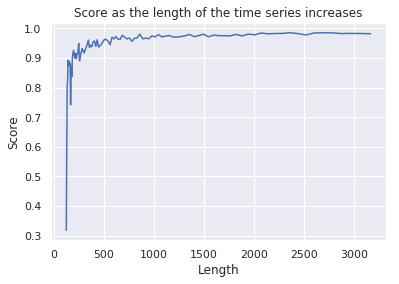

In [104]:
fig, ax = plt.subplots()
ax.plot(length_vec, score_vec)
ax.set_title('Score as the length of the time series increases')
ax.set_xlabel('Length')
ax.set_ylabel('Score');

# Effect of parallelization

In [129]:
n_par_max = 20
score_vec = np.zeros((n_par_max, ))
time_vec = np.zeros((n_par_max, ))
length = 4000

for n_par in range(1, n_par_max+1):
    print('Current parallelization number: ' + str(n_par))
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    b = Reservoir(future_pred=True, verbose=0, parallel_runs=n_par)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[n_par-1] = np.mean(valid_score)
    time_vec[n_par-1] = b.iterate_timer

score_vec2 = np.zeros((n_par_max, ))
length = 20000
for n_par in range(1, n_par_max+1):
    print('Current parallelization number: ' + str(n_par))
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    b = Reservoir(future_pred=True, verbose=0, parallel_runs=n_par)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=int(length / n_par), n_sequence=n_par)
    pred_output, valid_score = b.score(input_data)
    
    score_vec2[n_par-1] = np.mean(valid_score)
    time_vec[n_par-1] = b.iterate_timer

Current parallelization number: 1
Current parallelization number: 2
Current parallelization number: 3
Current parallelization number: 4
Current parallelization number: 5
Current parallelization number: 6
Current parallelization number: 7
Current parallelization number: 8
Current parallelization number: 9
Current parallelization number: 10
Current parallelization number: 11
Current parallelization number: 12
Current parallelization number: 13
Current parallelization number: 14
Current parallelization number: 15
Current parallelization number: 16
Current parallelization number: 17
Current parallelization number: 18
Current parallelization number: 19
Current parallelization number: 20
Current parallelization number: 1
Current parallelization number: 2
Current parallelization number: 3
Current parallelization number: 4
Current parallelization number: 5
Current parallelization number: 6
Current parallelization number: 7
Current parallelization number: 8
Current parallelization number: 9
Cur

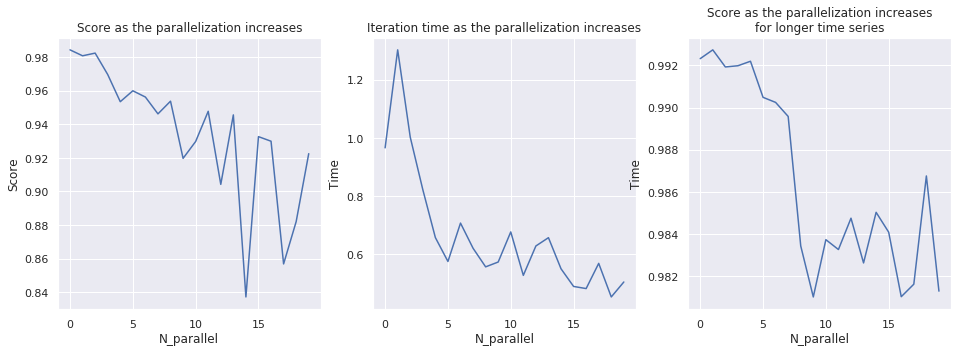

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
ax1.plot(score_vec)
ax1.set_title('Score as the parallelization increases')
ax1.set_xlabel('N_parallel')
ax1.set_ylabel('Score');
ax2.plot(time_vec)
ax2.set_title('Iteration time as the parallelization increases')
ax2.set_xlabel('N_parallel')
ax2.set_ylabel('Time');
ax3.plot(score_vec2)
ax3.set_title('Score as the parallelization increases\nfor longer time series')
ax3.set_xlabel('N_parallel')
ax3.set_ylabel('Time');

# Score for larger reservoirs

In [140]:
n_tries = 10
n_res_vec = np.ceil(np.logspace(2, 4, num=n_tries))
score_vec = np.zeros((n_tries, ))
time_vec = np.zeros((n_tries, ))

for i in range(n_tries):
    n_res = n_res_vec[i]
    print('Current neuron number: ' + str(n_res))
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    b = Reservoir(n_res=int(n_res), future_pred=True, verbose=0)
    b.fit(input_data)
    
    input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
    pred_output, valid_score = b.score(input_data)
    
    score_vec[i] = np.mean(valid_score)
    time_vec[i] = b.iterate_timer

Current neuron number: 100.0
Current neuron number: 167.0
Current neuron number: 279.0
Current neuron number: 465.0
Current neuron number: 775.0
Current neuron number: 1292.0
Current neuron number: 2155.0
Current neuron number: 3594.0
Current neuron number: 5995.0
Current neuron number: 10000.0


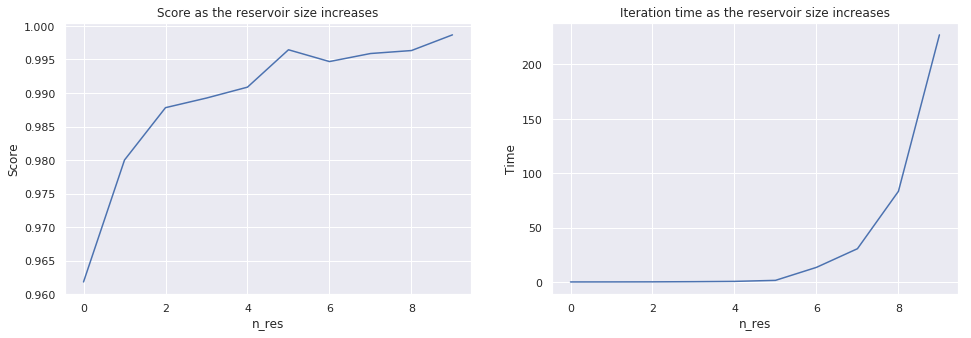

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(score_vec)
ax1.set_title('Score as the reservoir size increases')
ax1.set_xlabel('n_res')
ax1.set_ylabel('Score');
ax2.plot(time_vec)
ax2.set_title('Iteration time as the reservoir size increases')
ax2.set_xlabel('n_res')
ax2.set_ylabel('Time');

# Recursive prediction test

In [60]:
pred_horizon = 10
rec_pred_steps = 20

input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=1000, input_scale=2, 
              future_pred=True, pred_horizon=pred_horizon, rec_pred_steps=rec_pred_steps, train_param=2e1)
b.fit(input_data)

init_length = 1000
input_data = data1D.mackey_glass(sequence_length=init_length+pred_horizon*rec_pred_steps)
pred_output = b.recursive_predict(input_data[:,:init_length,:])

Start of training...
Initialization finished. Elapsed time: 0.039997100830078125s
100%|██████████| 10000/10000 [00:05<00:00, 1771.53it/s]
Iterations finished. Elapsed time: 5.647035121917725s
Training finished. Elapsed time: 0.341782808303833s
Training score: 0.9911251542767702
Start of testing...
Initialization finished. Elapsed time:
0.0004355907440185547
100%|██████████| 1000/1000 [00:00<00:00, 2157.87it/s]
Iterations finished. Elapsed time:
0.4659860134124756
100%|██████████| 10/10 [00:00<00:00, 1159.80it/s]
Testing finished. Elapsed time:
0.2988152503967285


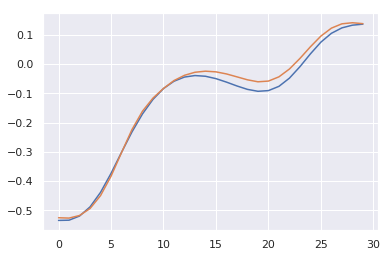

In [61]:
total_pred = pred_horizon*rec_pred_steps
plt.plot(np.squeeze(input_data[0,-total_pred-10:-total_pred+20,0]))
plt.plot(np.squeeze(pred_output[0,-total_pred-10:-total_pred+20,0]));

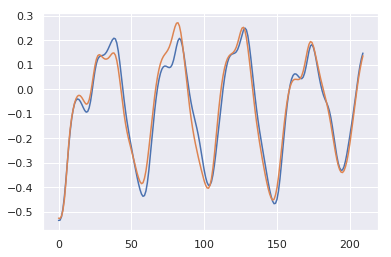

In [62]:
total_pred = pred_horizon*rec_pred_steps
plt.plot(np.squeeze(input_data[0,-total_pred-10:,0]))
plt.plot(np.squeeze(pred_output[0,-total_pred-10:,0]));

# Phase test

In [2]:
input_data = data1D.mackey_glass(sequence_length=4000, n_sequence=1)
b = Reservoir(n_res=2000, res_encoding=None, 
              input_scale=1, input_encoding='phase', 
              random_projection='simulation', weights_type='complex gaussian', 
              activation_fun='phase', activation_param=np.pi, 
              parallel_runs=1, forget=100,
              future_pred=True, pred_horizon=100, rec_pred_steps=1,
              train_method='ridge', train_param=1e0
              )
b.fit(input_data);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 0.379899263381958 s
100%|██████████| 4000/4000 [00:15<00:00, 223.68it/s]
Reservoir iterations complete. 		Elapsed time: 15.249776124954224 s
Training complete. 			Elapsed time: 0.7910618782043457 s
Training score: 0.9639551695046149


In [3]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=1)

pred_output, valid_score = b.predict_and_score(input_data, detailed_score=True);

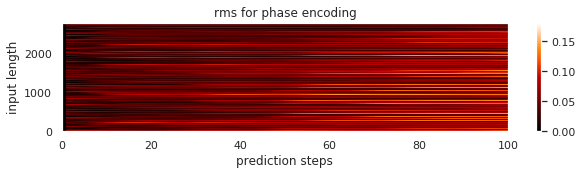

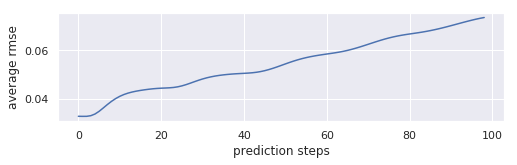

In [14]:
# prediction performence map
total_pred = b.pred_horizon*b.rec_pred_steps
input_samples_number = pred_output.shape[0] - total_pred
rms = np.zeros((input_samples_number, total_pred))
for n_input in range(1, input_samples_number):
    for n_pred in range(1, total_pred):
        d1 = pred_output[n_input, 0:n_pred]
        d2 = input_data[:,b.forget+n_input:b.forget+n_input+n_pred,:]
        
        rms[n_input, n_pred] = np.sqrt(np.sum((d1.flatten() - d2.flatten())**2)/n_pred)


plt.figure(1,figsize=(10,2))
plt.title('rms for phase encoding')
plt.ylabel('input length')
plt.xlabel('prediction steps')
im=plt.pcolormesh(rms, cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8,2))
plt.ylabel('average rmse')
plt.xlabel('prediction steps')
plt.plot(np.sum(rms[:,1:], axis=0)/input_samples_number)
plt.show;
# np.save('SLM_timesteps_20000.npy', np.sum(rms[:,1:], axis=0)/length_input)

# Binary test

In [15]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=1000, res_encoding=None,
              input_scale=2, input_encoding='naive binary', input_enc_dim=1000, 
              random_projection='simulation', weights_type='complex gaussian', 
              activation_fun='binary', 
              parallel_runs=1, forget=100,
              future_pred=True, pred_horizon=100, rec_pred_steps=1,
              train_method='ridge', train_param=1e0, is_complex=False
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.26746225357055664s
100%|██████████| 10000/10000 [00:17<00:00, 569.05it/s]
Iterations finished. Elapsed time: 17.57500123977661s
Training finished. Elapsed time: 1.0829782485961914s
Training score: 0.7307944858238598


In [16]:
input_data = data1D.mackey_glass(sequence_length=1000, n_sequence=1)

pred_output, valid_score = b.predict_and_score(input_data, detailed_score=True);

Start of testing...
Initialization finished. Elapsed time: 0.025656461715698242
100%|██████████| 3000/3000 [00:05<00:00, 512.40it/s]
Iterations finished. Elapsed time: 5.8565638065338135
Testing finished. Elapsed time: 0.1387653350830078
Testing score: 0.592820958544242


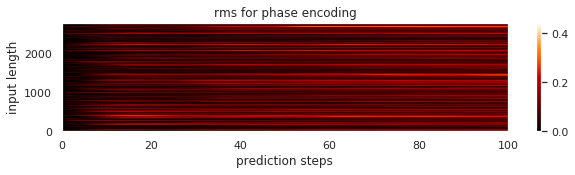

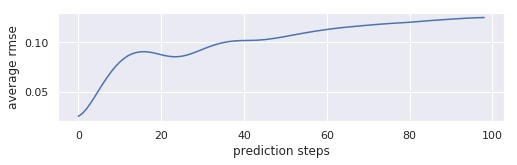

In [18]:
# prediction performence map
total_pred = b.pred_horizon*b.rec_pred_steps
input_samples_number = pred_output.shape[0] - total_pred
rms = np.zeros((input_samples_number, total_pred))
for n_input in range(1, input_samples_number):
    for n_pred in range(1, total_pred):
        d1 = pred_output[n_input, 0:n_pred]
        d2 = input_data[:,b.forget+n_input:b.forget+n_input+n_pred,:]
        
        rms[n_input, n_pred] = np.sqrt(np.sum((d1.flatten() - d2.flatten())**2)/n_pred)


plt.figure(1,figsize=(10,2))
plt.title('rms for phase encoding')
plt.ylabel('input length')
plt.xlabel('prediction steps')
im=plt.pcolormesh(rms, cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8,2))
plt.ylabel('average rmse')
plt.xlabel('prediction steps')
plt.plot(np.sum(rms[:,1:], axis=0)/input_samples_number)
plt.show;
# np.save('SLM_timesteps_20000.npy', np.sum(rms[:,1:], axis=0)/length_input)

# Recursive prediction score

In [4]:
pred_horizon = 10
rec_pred_steps = 10

input_data = data1D.mackey_glass(sequence_length=4000, n_sequence=1)
b = Reservoir(n_res=1000, input_scale=2,
              future_pred=True, pred_horizon=pred_horizon, rec_pred_steps=rec_pred_steps, train_param=2e1)
b.fit(input_data)

init_length = 1000
input_data = data1D.mackey_glass(sequence_length=init_length+pred_horizon*rec_pred_steps)
error_vec, pred_output = b.recursive_predict_score(input_data)

Start of training...
Initialization finished. Elapsed time: 0.0428471565246582s
100%|██████████| 4000/4000 [00:00<00:00, 4710.27it/s]
Iterations finished. Elapsed time: 0.853271484375s
Training finished. Elapsed time: 0.18016386032104492s
Training score: 0.9839815019069676
Start of testing...
Initialization finished. Elapsed time:
0.00032520294189453125
100%|██████████| 1000/1000 [00:00<00:00, 4166.65it/s]
Iterations finished. Elapsed time:
0.24195194244384766


ValueError: could not broadcast input array from shape (899,1) into shape (999,1)

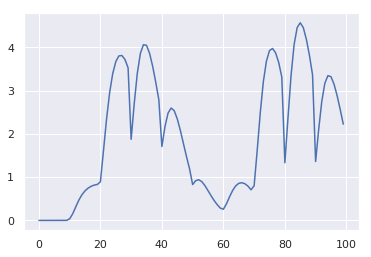

In [42]:
plt.plot(score_vec)

# Best params

In [2]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=1000, res_scale=0.1, res_encoding='phase', res_enc_param=1.5*np.pi,
              input_scale=.7, input_encoding='phase',
              random_projection='simulation', weights_type='complex gaussian',
              activation_fun='intensity', activation_param=10,
              parallel_runs=1,  bias_scale=1, leak_rate=0.15,
              future_pred=True, pred_horizon=2000, rec_pred_steps=1,
              train_method='ridge', train_param=1e-3, verbose=1
             )
b.fit(input_data);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 0.2619442939758301 s
100%|██████████| 10000/10000 [00:12<00:00, 832.19it/s]
Reservoir iterations complete. 		Elapsed time: 12.018614292144775 s
Training complete. 			Elapsed time: 7.9153876304626465 s
Training score: 0.5526957589713178


In [5]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)

pred_output, valid_score = b.predict_and_score(input_data, detailed_score=True);

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.001188516616821289 s
100%|██████████| 10000/10000 [00:13<00:00, 754.63it/s]
Reservoir iterations complete. 		Elapsed time: 13.25340986251831 s
Testing complete. 			Elapsed time: 7.537252902984619 s
Testing score: 0.13815711673704822


In [ ]:
# prediction performence map
total_pred = b.pred_horizon*b.rec_pred_steps
input_samples_number = pred_output.shape[0] - total_pred
rms = np.zeros((input_samples_number, total_pred))
for n_input in range(1, input_samples_number):
    for n_pred in range(1, total_pred):
        d1 = pred_output[n_input, 0:n_pred]
        d2 = input_data[:,b.forget+n_input:b.forget+n_input+n_pred,:]
        
        rms[n_input, n_pred] = np.sqrt(np.sum((d1.flatten() - d2.flatten())**2)/n_pred)


plt.figure(1,figsize=(10,2))
plt.title('rms for phase encoding')
plt.ylabel('input length')
plt.xlabel('prediction steps')
im=plt.pcolormesh(rms, cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8,2))
plt.ylabel('average rmse')
plt.xlabel('prediction steps')
plt.plot(np.sum(rms[:,1:], axis=0)/input_samples_number)
plt.show;
# np.save('SLM_timesteps_20000.npy', np.sum(rms[:,1:], axis=0)/length_input)

# SLM experiment 

In [1]:
import numpy as np
import time

from reservoir import Reservoir
import data1D

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
matlab_eng=None

In [2]:
cam_roi = [150, 150]
slm_size = [200, 200]
n_res = 20000
leak_rate = 0.3
train_param = 1000
sequence_length = 500

# Initializing the SLM, MAITAI and the CAMERA
if matlab_eng is None:
    import matlab.engine
    matlab_eng = matlab.engine.start_matlab()
    matlab_eng.cd(r'D:\Users\Mickael-manip\Desktop\JonMush', nargout=0)
    matlab_eng.open_maitai(nargout=0)
else:
    matlab_eng.close_camera(nargout=0)
    matlab_eng.close_slm(nargout=0)

if cam_roi is None:
    cam_roi = [350, 350]
matlab_eng.workspace['cam_roi'] = matlab.double(cam_roi)
matlab_eng.open_camera(nargout=0)
if slm_size is None:
    slm_size = [512, 512]
matlab_eng.workspace['slm_size'] = matlab.double(slm_size)
matlab_eng.open_slm(nargout=0)
cam_sampling_range = np.linspace(0, (cam_roi[0]-1)*(cam_roi[1]-1)-1, n_res, dtype='uint32')

input_data = data1D.mackey_glass(sequence_length=sequence_length, n_sequence=1)
b = Reservoir(n_res=n_res, res_encoding='meadowlark slm', res_enc_param=int(256/2),
              input_scale=1, input_encoding='meadowlark slm', input_enc_param=int(256/2),
              random_projection='meadowlark slm', weights_type='complex gaussian', 
              bias_scale=0, forget=100, leak_rate = leak_rate,
              pred_horizon=100, rec_pred_steps=1,
              train_method='ridge', train_param=train_param, verbose=1, 
              slm_size=slm_size, cam_roi=cam_roi, matlab_eng=matlab_eng,
              cam_sampling_range=cam_sampling_range
              )

b.fit(input_data);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 0.009999990463256836 s
100%|████████████████████████████████████████| 500/500 [00:24<00:00, 20.47it/s]
Reservoir iterations complete. 		Elapsed time: 24.426999807357788 s
Training complete. 			Elapsed time: 1.0870001316070557 s
Training score: 0.996842745552845


In [3]:
input_data = data1D.mackey_glass(sequence_length=2000, n_sequence=1)

pred_output, valid_score = b.predict_and_score(input_data, detailed_score=True);

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.002000093460083008 s
 85%|████████████████████████████████▏     | 1692/2000 [01:10<00:13, 23.58it/s]

MatlabExecutionError: 
  File D:\Users\Mickael-manip\Desktop\JonMush\get_speckle.m, line 37, in get_speckle
Missing trigger, no frame captured by the camera.


 85%|████████████████████████████████▏     | 1692/2000 [01:30<00:13, 23.58it/s]

In [1]:
import numpy as np
import time

from reservoir import Reservoir
import data1D

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
matlab_eng=None

sequence_length = 5000

cam_roi_grid = [250, 350, 450]
slm_size_grid = [200, 300, 400, 500]
n_res_grid = [10000]
leak_rate_grid = [0.3]
train_param_grid = [1e4]
final_score = np.zeros((len(cam_roi_grid), len(slm_size_grid), len(n_res_grid), 
                        len(leak_rate_grid), len(train_param_grid)))
for i_cam, cam_roi_ in enumerate(cam_roi_grid):
    for i_slm, slm_size_ in enumerate(slm_size_grid):
        for i_res, n_res in enumerate(n_res_grid):
            for i_leak, leak_rate in enumerate(leak_rate_grid):
                for i_train_param, train_param in enumerate(train_param_grid):
                    start = time.time()
                    cam_roi = [cam_roi_, cam_roi_]
                    slm_size = [slm_size_, slm_size_]
                    # Initializing the SLM, MAITAI and the CAMERA
                    if matlab_eng is None:
                        import matlab.engine
                        matlab_eng = matlab.engine.start_matlab()
                        matlab_eng.cd(r'D:\Users\Mickael-manip\Desktop\JonMush', nargout=0)
                        matlab_eng.open_maitai(nargout=0)
                    else:
                        matlab_eng.close_camera(nargout=0)
                        matlab_eng.close_slm(nargout=0)

                    if cam_roi is None:
                        cam_roi = [350, 350]
                    matlab_eng.workspace['cam_roi'] = matlab.double(cam_roi)
                    matlab_eng.open_camera(nargout=0)
                    if slm_size is None:
                        slm_size = [512, 512]
                    matlab_eng.workspace['slm_size'] = matlab.double(slm_size)
                    matlab_eng.open_slm(nargout=0)
                    cam_sampling_range = np.linspace(0, (cam_roi[0]-1)*(cam_roi[1]-1)-1, n_res, dtype='uint32')

                    input_data = data1D.mackey_glass(sequence_length=sequence_length, n_sequence=1)
                    b = Reservoir(n_res=n_res, res_encoding='meadowlark slm', res_enc_param=int(256/2),
                                  input_scale=1, input_encoding='meadowlark slm', input_enc_param=int(256/2),
                                  random_projection='meadowlark slm', weights_type='complex gaussian', 
                                  bias_scale=0, forget=100, leak_rate = leak_rate,
                                  pred_horizon=100, rec_pred_steps=1,
                                  train_method='ridge', train_param=train_param, verbose=0, 
                                  slm_size=slm_size, cam_roi=cam_roi, matlab_eng=matlab_eng,
                                  cam_sampling_range=cam_sampling_range
                                  )
                    b.fit(input_data);

                    score = 0
                    for i in range(5):
                        input_data = data1D.mackey_glass(sequence_length=2000, n_sequence=1)
                        score = score + b.predict_and_score(input_data, only_score=True)
                    final_score[i_cam, i_slm, i_res, i_leak, i_train_param] = score/5
                    print(
                        'the execution time is', str(time.time() - start),
                        ', the testing score is', str(final_score[i_cam, i_slm, i_res, i_leak, i_train_param]), 
                        ', for cam_roi=',str(cam_roi), 
                        ', for slm_size=',str(slm_size),
                        ', for n_res=',str(n_res),
                        ', for leak_rate=',str(leak_rate),
                        ', for train_param=',str(train_param))

MatlabExecutionError: 
  File D:\Users\Mickael-manip\Desktop\JonMush\get_speckle.m, line 37, in get_speckle
Missing trigger, no frame captured by the camera.


In [ ]:
1+1

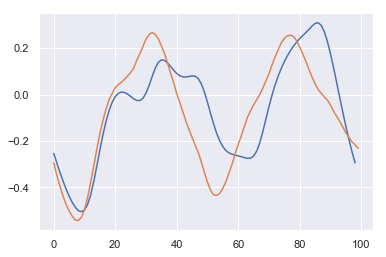

In [5]:
total_pred = b.pred_horizon*b.rec_pred_steps
N = 800
plt.plot(np.squeeze(input_data[0,-N:-N-1+total_pred,0]))
plt.plot(np.squeeze(pred_output[-N,:]))

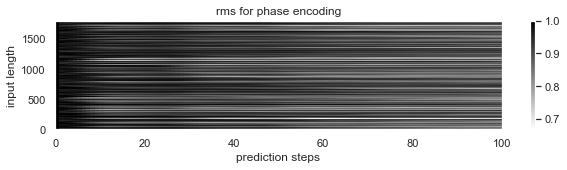

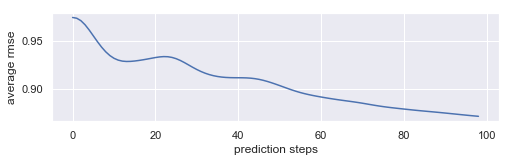

In [4]:
# prediction performence map
total_pred = b.pred_horizon*b.rec_pred_steps
input_samples_number = pred_output.shape[0] - total_pred
rms = np.zeros((input_samples_number, total_pred))
for n_input in range(1, input_samples_number):
    for n_pred in range(1, total_pred):
        d1 = pred_output[n_input, 0:n_pred]
        d2 = input_data[:,b.forget+n_input:b.forget+n_input+n_pred,:]
        
        rms[n_input, n_pred] = np.sqrt(np.sum((d1.flatten() - d2.flatten())**2)/n_pred)


plt.figure(1, figsize=(10,2))
plt.title('rms for phase encoding')
plt.ylabel('input length')
plt.xlabel('prediction steps')
im=plt.pcolormesh(1-rms, cmap='gist_yarg')
plt.colorbar(im)
plt.show;

plt.figure(2, figsize=(8,2))
plt.ylabel('average rmse')
plt.xlabel('prediction steps')
plt.plot(1 - np.sum(rms[:,1:], axis=0)/input_samples_number)
plt.show;
# np.save('SLM_timesteps_20000.npy', np.sum(rms[:,1:], axis=0)/length_input)

In [ ]:
the execution time is 391.72899985313416 , the testing score is 0.25654986990150747 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 1.0
the execution time is 357.84800004959106 , the testing score is 0.41819151740251037 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 100.0
the execution time is 358.3440001010895 , the testing score is 0.6106914044567919 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 10000.0
the execution time is 357.59800004959106 , the testing score is 0.47710492245698577 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 1.0
the execution time is 356.4652500152588 , the testing score is 0.45533224007101436 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 100.0
the execution time is 356.9852499961853 , the testing score is 0.6508614917693127 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 10000.0
the execution time is 357.5037500858307 , the testing score is 0.5091154594609197 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 1.0
the execution time is 358.58899998664856 , the testing score is 0.528347027430373 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 100.0
the execution time is 360.2182500362396 , the testing score is 0.6849491718855012 , for cam_roi= [150, 150] , for slm_size= [200, 200] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 10000.0
the execution time is 342.65000009536743 , the testing score is 0.39774353651658234 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 1.0
the execution time is 355.01900005340576 , the testing score is 0.3329747570673695 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 100.0
the execution time is 343.1659998893738 , the testing score is 0.5770563835012998 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 10000.0
the execution time is 344.7190001010895 , the testing score is 0.4240153308329567 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 1.0
the execution time is 343.62975001335144 , the testing score is 0.45642279401875047 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 100.0
the execution time is 343.17925000190735 , the testing score is 0.63705653921956 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 10000.0
the execution time is 343.05949997901917 , the testing score is 0.08657420996673408 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 1.0
the execution time is 350.6449999809265 , the testing score is 0.5021852235668084 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 100.0
the execution time is 341.5164999961853 , the testing score is 0.6362746876385812 , for cam_roi= [150, 150] , for slm_size= [300, 300] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 10000.0
the execution time is 369.44924998283386 , the testing score is 0.3894710929004911 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 1.0
the execution time is 368.2074999809265 , the testing score is 0.422873532934659 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 100.0
the execution time is 369.80849981307983 , the testing score is 0.6320734121688059 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.1 , for train_param= 10000.0
the execution time is 369.58024978637695 , the testing score is 0.32088713117313883 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 1.0
the execution time is 371.960000038147 , the testing score is 0.47182751189673766 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 100.0
the execution time is 372.7994999885559 , the testing score is 0.64946853256529 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.2 , for train_param= 10000.0
the execution time is 371.446249961853 , the testing score is 0.5271434594416351 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 1.0
the execution time is 370.8527500629425 , the testing score is 0.5412955713418934 , for cam_roi= [150, 150] , for slm_size= [400, 400] , for n_res= 10000 , for leak_rate= 0.3 , for train_param= 100.0